# Supervised Learning

## Preprocessing Data for Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('bmh')

In [3]:
path = r'/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Dictionary
|Variable|	Definition	|Key
|--------|--------|--------|
|survival|	Survival	|0 = No, 1 = Yes
|pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
|sex|	Sex	|
|Age|	Age in years	|
|sibsp|	# of siblings / spouses aboard the Titanic	 |
|parch|	# of parents / children aboard the Titanic	|
|ticket|	Ticket number	|
|fare|	Passenger fare|
|cabin|	Cabin number	|
|embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes
**pclass:** A proxy for socio-economic status (SES)</br>
- 1st = Upper
- 2nd = Middle
- 3rd = Lower 
 
 
**age:** </br>
Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 </br>
- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson </br>
Some children travelled only with a nanny, therefore parch=0 for them.

> Here, the target is "Survived" because we are trying to predict who survived (1) and who didn't (0)

## EDA

In [4]:
# check for missing data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
687/len(df)

0.7710437710437711

In [6]:
177/len(df)

0.19865319865319866

- We have Age, Cabin, and Embarked with missing values
- We'll discuss techniques for each in our preprocessing section

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- The ratio of survived = the average = 0.384
- The oldest person was 80 and the youngest was 5 months old
- 75% (majority) of the passengers were 38 years old and below 
- Based on 75th percentile most passengers had 1 sibling/spouse at most
- 50% of our population are single travelers 

<Axes: ylabel='Pclass'>

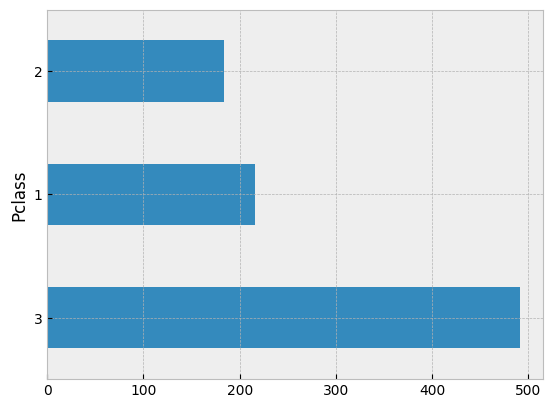

In [8]:
df['Pclass'].value_counts().plot(kind='barh')

- Class 3 is the most common

<Axes: ylabel='SibSp'>

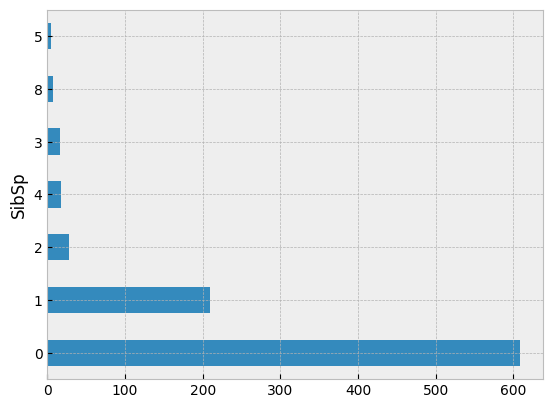

In [9]:
df['SibSp'].value_counts().plot(kind='barh')

In [10]:
df['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

### Fare vs Class Comparison

In [11]:
df.groupby('Pclass')[['Fare']].agg(['min', 'max', 'mean', 'median'])

Fare                              
        min       max       mean   median
Pclass                                   
1       0.0  512.3292  84.154687  60.2875
2       0.0   73.5000  20.662183  14.2500
3       0.0   69.5500  13.675550   8.0500

- Min for all classes is zero. Could be staff members
- Max for 1st class is 512 and median is 60. Both are higher than other classes
- However, the median of the 1st class is lower than the max of the 3rd class. could be a rare occasion (people booking 3rd class ticket last minute)
- The gap between avg of 3rd and 2nd classes is smaller than the one between 2nd and 1st classes

<Axes: xlabel='Embarked', ylabel='count'>

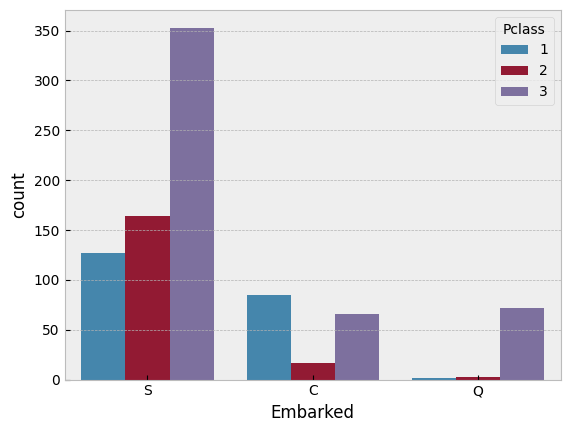

In [12]:
sns.countplot(data=df, x='Embarked', hue='Pclass')

- Most passengers embarked from port S. 
- In both ports S and Q, the majority of passengers had class = 3. However, Port Q had the highest ratio of class = 3
- Port C is th only port where we see a higher 1st class ratio

**Summary** The Southampton was the primary port for third-class passengers, while Cherbourg had a higher proportion of first-class passengers.

### Getting The Ratio of Survived for Each Port (Embarked)

In [13]:
df.groupby('Embarked')[['Survived']].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


### Inspect Our Common Knowledge About Titanic Survivors Demographics
Old people, children, and women were prioritized

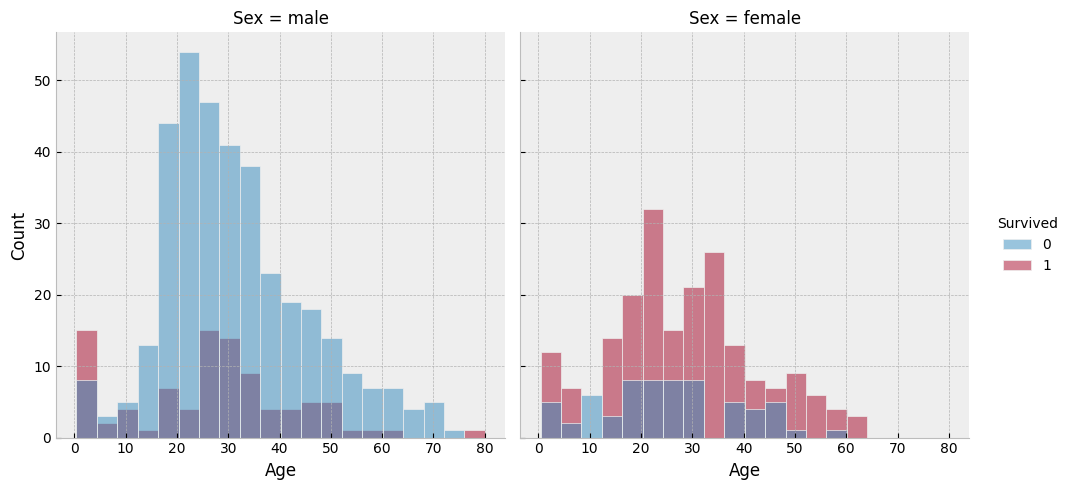

In [89]:
sns.displot(data=df, x='Age', col='Sex', hue='Survived')

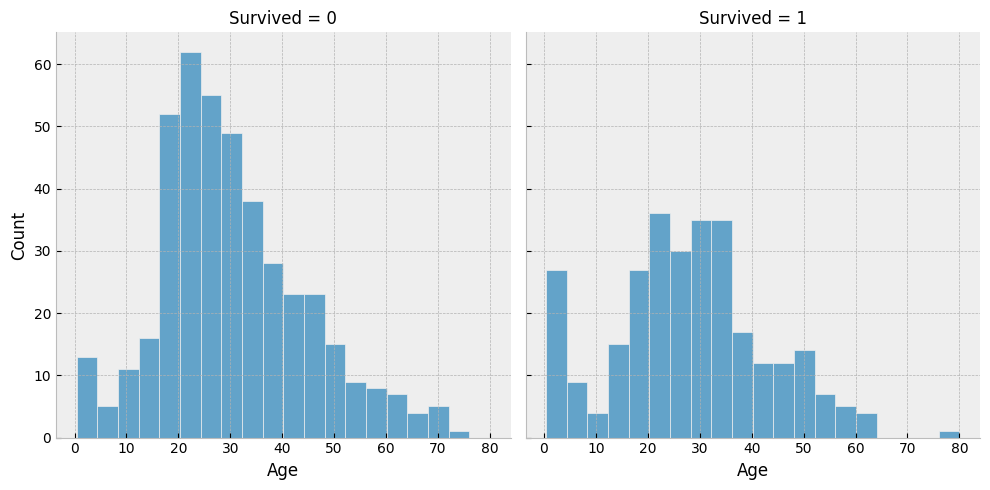

In [15]:
sns.displot(data=df, x='Age', col='Survived')

- Viz above proves our initial thoughts about the Titanic crisis:
    - We see higher ratio of women that survived compared to men.
    - Even for male, we see a spike in lower age values (children) and higher (old people)
- In other words, Kids (ages 0–10) had a higher survival rate compared to adult males, which aligns with the prioritization of children during evacuation.
- The majority of the passengers were male

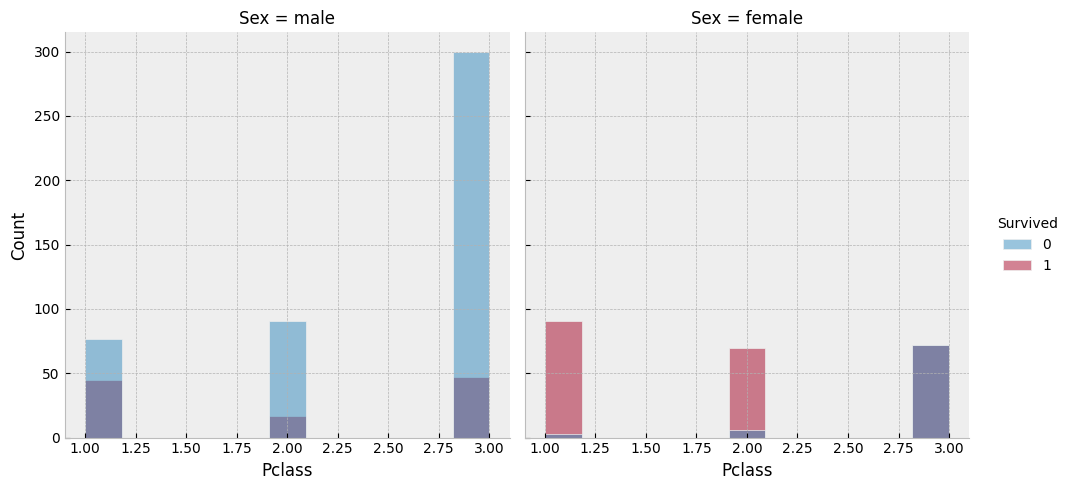

In [90]:
sns.displot(data=df, x='Pclass', col='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

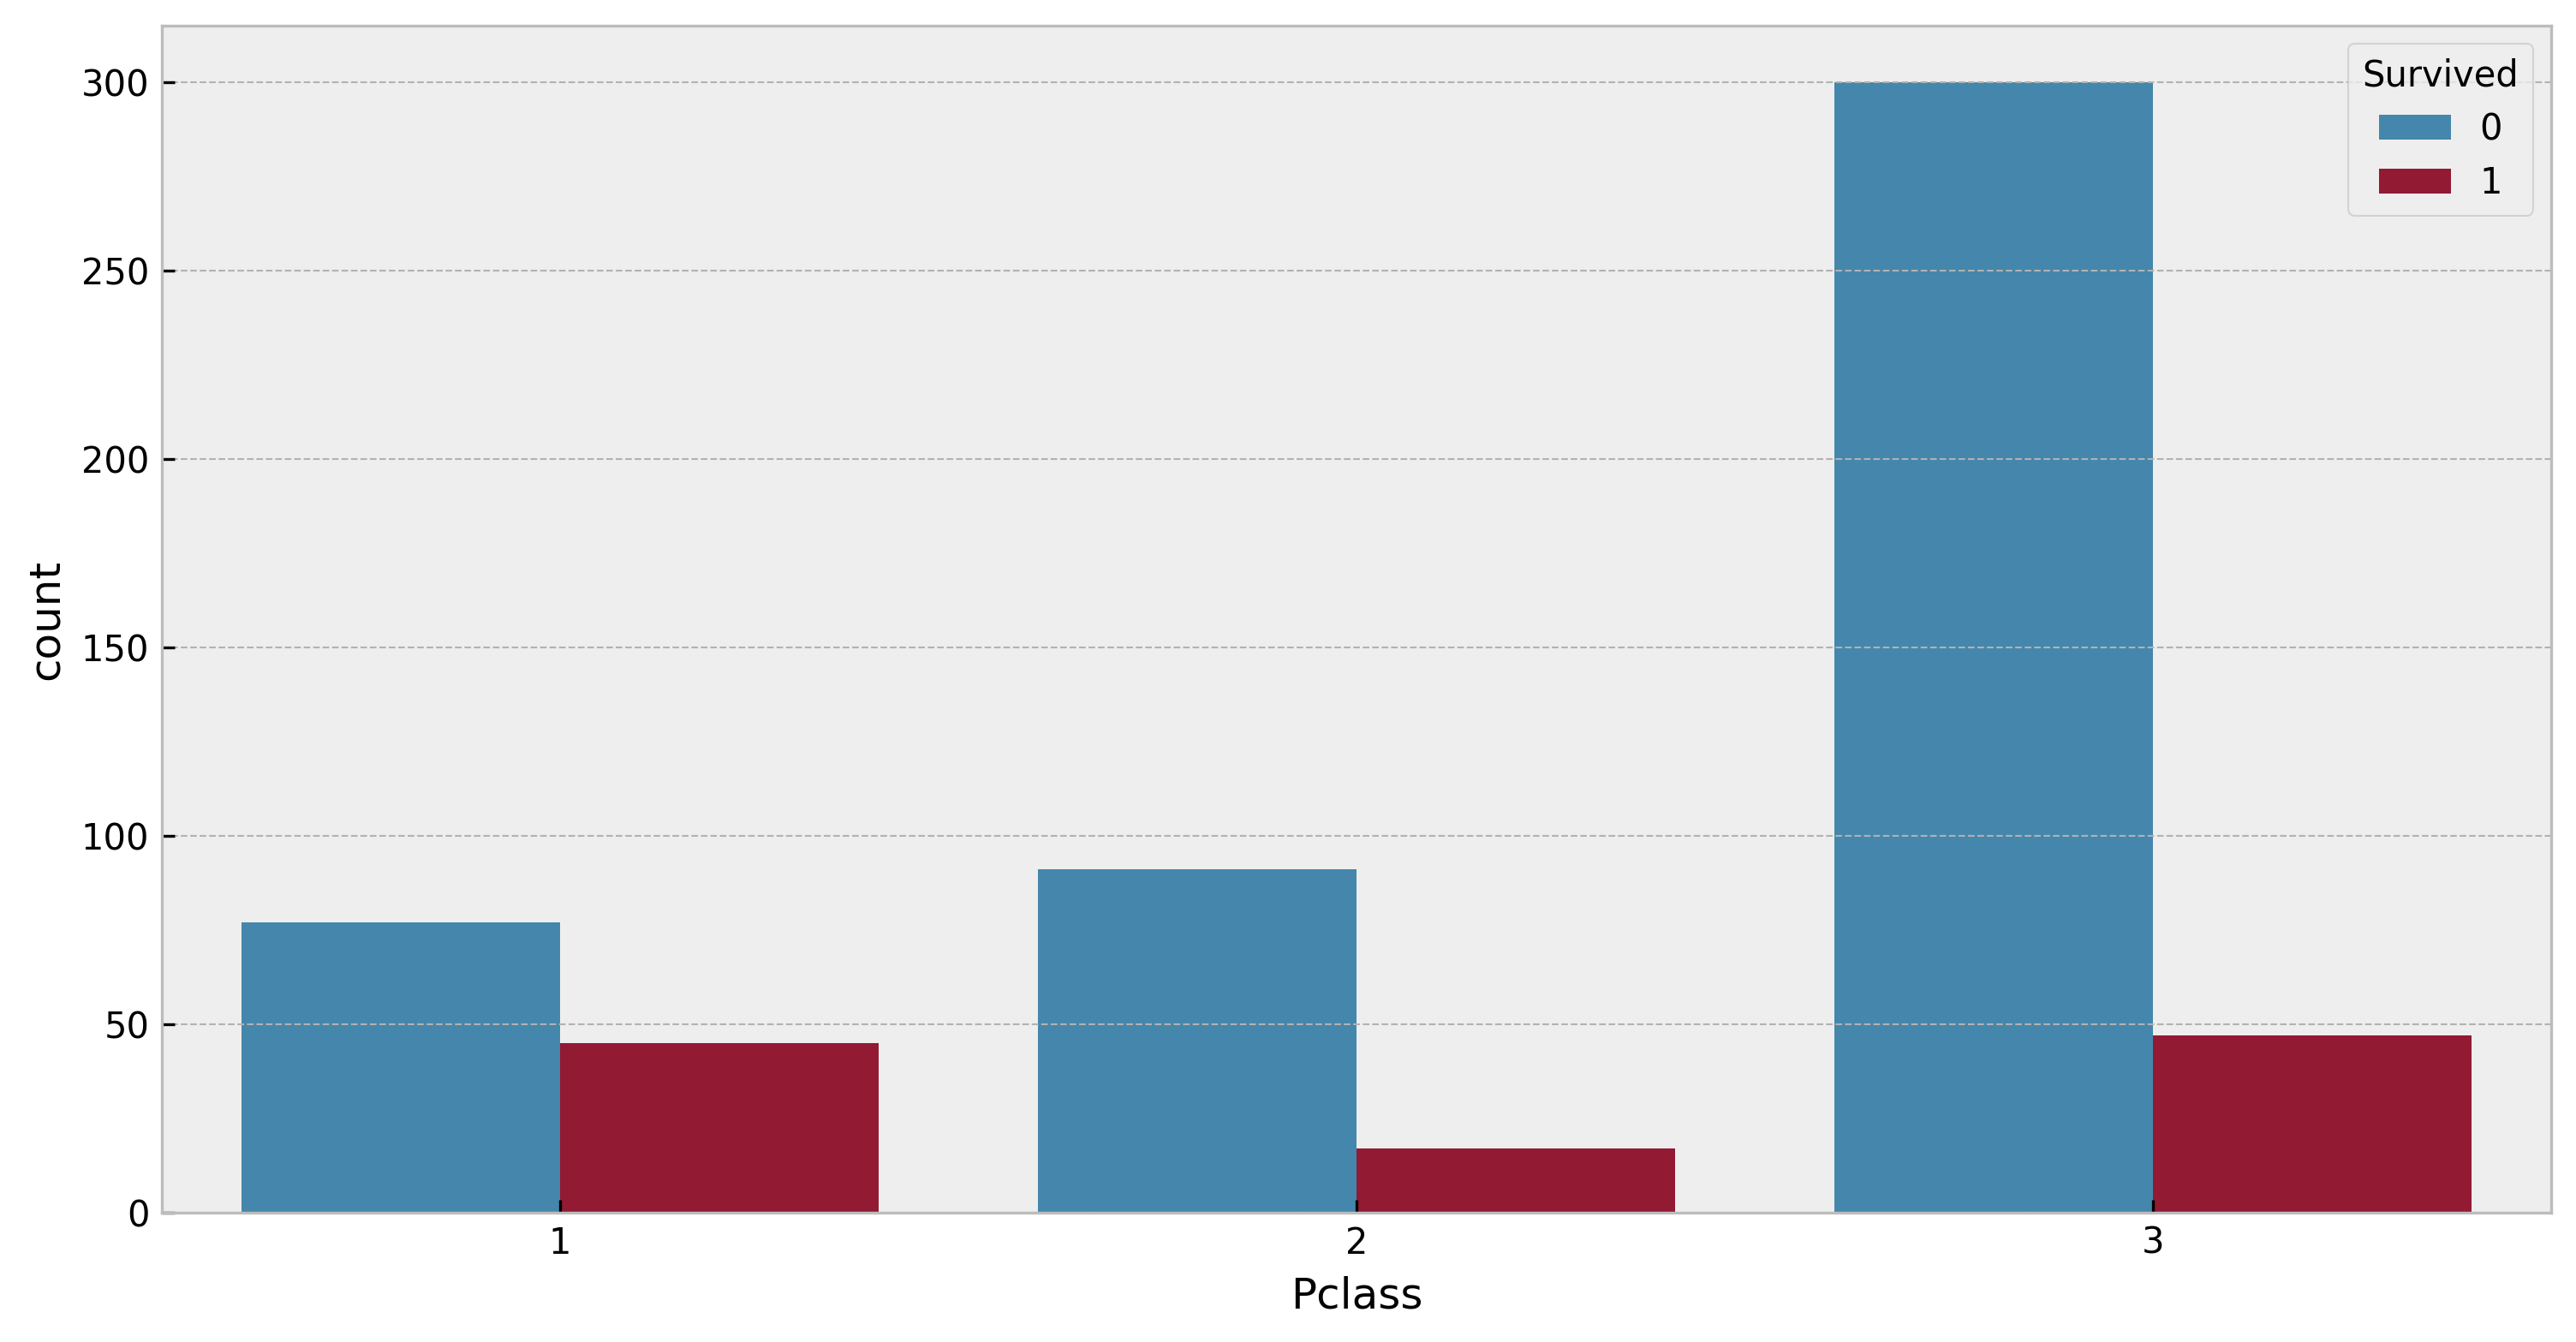

In [91]:
plt.figure(figsize=(12,6), dpi=300)
sns.countplot(data=df[df['Sex']=='male'], x='Pclass', hue='Survived')

In [92]:
df.groupby('Sex')[['Survived']].agg(['mean', 'count'])

Survived      
            mean count
Sex                   
female  0.742038   314
male    0.188908   577

The ratio of survived females is higher than the one for survived males

In [93]:
df_without_children = df[df['Age']>12]
df_without_children.groupby('Sex')[['Survived']].agg(['mean', 'count'])

Survived      
            mean count
Sex                   
female  0.777293   229
male    0.173077   416

In [94]:
df_only_children = df[df['Age']<=12]
df_only_children.groupby('Sex')[['Survived']].agg(['mean', 'count'])

Survived      
            mean count
Sex                   
female  0.593750    32
male    0.567568    37

In [95]:
df_only_children['Survived'].mean()

0.5797101449275363

In [96]:
# checking for the bar with females under 10 that did not survive
female_kids_non_survivors = df[(df['Age'] <= 10) & (df['Sex'] == 'female') & (df['Survived'] == 0)]
print(female_kids_non_survivors[['Name', 'Pclass', 'Ticket']])

                                     Name  Pclass      Ticket
24          Palsson, Miss. Torborg Danira       3      349909
119     Andersson, Miss. Ellis Anna Maria       3      347082
147      Ford, Miss. Robina Maggie "Ruby"       3  W./C. 6608
205            Strom, Miss. Telma Matilda       3      347054
297          Allison, Miss. Helen Loraine       1      113781
374            Palsson, Miss. Stina Viola       3      349909
419             Van Impe, Miss. Catharina       3      345773
541  Andersson, Miss. Ingeborg Constanzia       3      347082
634                    Skoog, Miss. Mabel       3      347088
642         Skoog, Miss. Margit Elizabeth       3      347088
813    Andersson, Miss. Ebba Iris Alfrida       3      347082
852               Boulos, Miss. Nourelain       3        2678


Let's check if passengers with 1st class tickets had a special treatment (more chances to survive)

<Axes: xlabel='Pclass', ylabel='count'>

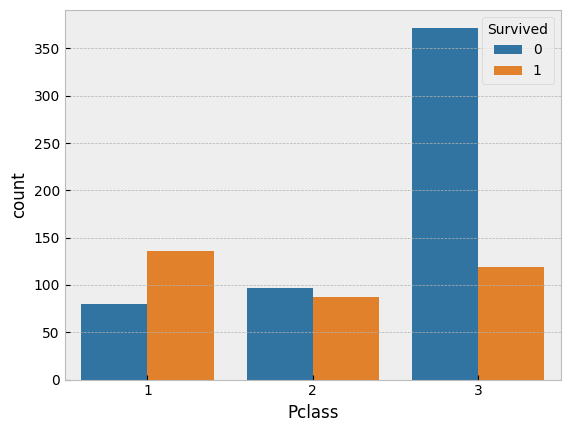

In [97]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette='tab10')

- The passengers with 3rd class tickets had the lowest odds of survival.
- In other words, 1st class had a special treatment based on the data. And the ratio of survival was higher than no survival
- 2nd class may have had a special treatment too, but not as good as 1st class

In [98]:
df.sample(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
743,744,0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S


## Preprocessing and Feature Engineering

- Stage 1:
    1. Imputation
    2. Feature Selection (dropping unnecessary columns)
    3. Encoding
    4. Feature extraction
        - Family size 
        - Alone indicator (T/F)
        - Child indicator 
        - Age bands
- Stage 2
    - Split the data into X and y
    - Scaling
    - Split the data into train and test (X train, X test, y train, y test)

there were a total of 2240 passengers/crew on the titanic.  the data set is 891 with survival status.  the ML will help us fill in the survival status of the 2240 passenger, based on variables we determine, cabin, sex, pclass, etc

### Imputation

In [99]:
cols_with_nulls = df.columns[df.isna().sum()>0]
cols_with_nulls

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [100]:
for col in cols_with_nulls:
    print(f'{col}: {df[col].isna().sum()/len(df):.4f}')

Age: 0.1987
Cabin: 0.7710
Embarked: 0.0022


- We have Age, Embarked, and Cabin that have missing values
- Techniques:
    - **Cabin** Drop the column. We have a large ratio of missing values. We cannot rely on this colum at this point.
    - **Embarked** We can either _drop_ the rows or use _mode_ to impute. It's a categorical column.
    - **Age** We can use a sophisticated approach to impute by sub-groups

In [101]:
df.drop(columns='Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In the past, male children had "Master" title to their name. Let's inspect that, could be helpful for imputation.

In [102]:
mask = df['Name'].str.contains('Master')
df[mask].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S


In [103]:
df[mask]['Age'].describe()

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

with a max 12, the fact we stated earlier holds.

In [104]:
df[mask]['Age'].isna().sum()

4

Method above may not be effective. We need larger subgroups.

In [105]:
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0]
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs


In [106]:
df['Title'].value_counts()

Title
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Title'>

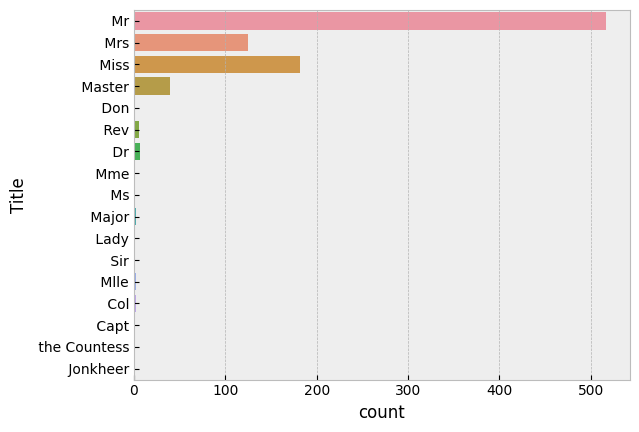

In [107]:
sns.countplot(data= df, y='Title')

In [108]:
df.groupby(['Title'])[['Age']].mean()

,Age
Title,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167
Miss,21.773973


Now we can impute based on the averages above

<Axes: xlabel='Age', ylabel='Count'>

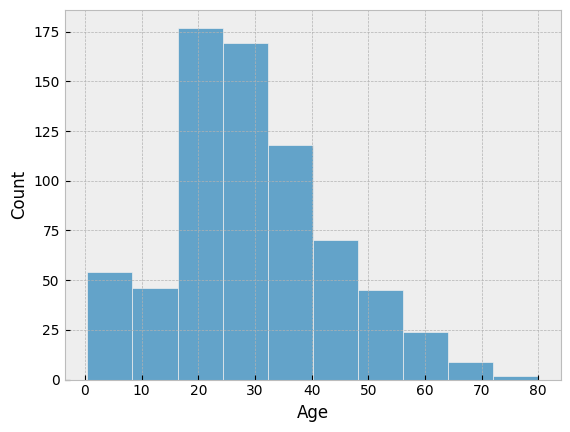

In [109]:
sns.histplot(df['Age'], bins=10)

In [110]:
for val in df['Title'].unique():
    mask = df['Title']==val
    if df[mask]['Age'].isna().sum()>0:
        print(f"{val}: {df[mask]['Age'].isna().sum()} | Median Age: {df[mask]['Age'].median():.2f}")

 Mr: 119 | Median Age: 30.00
 Mrs: 17 | Median Age: 35.00
 Miss: 36 | Median Age: 21.00
 Master: 4 | Median Age: 3.50
 Dr: 1 | Median Age: 46.50


In [111]:
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'), inplace=True)
df['Age'].isna().sum()

0

> It's always recommended to check for the distribution after imputation to make sure it did not impact the skewness.

<Axes: xlabel='Age', ylabel='Count'>

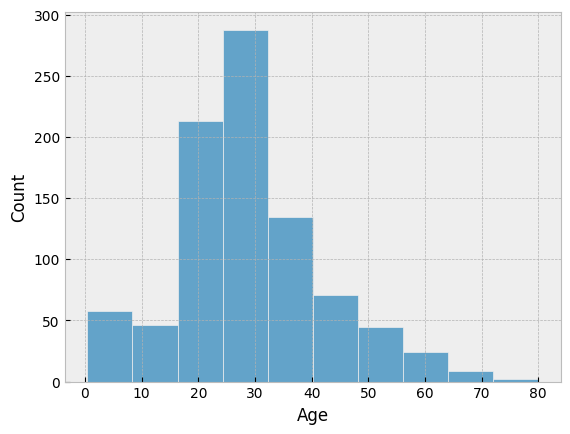

In [112]:
sns.histplot(df['Age'], bins=10)

Since the distribution is close to the original one (before imputation) we can continue with the method used.

### Feature Selection

In [113]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [114]:
df.drop(columns=['PassengerId', 'Name', 'Title','Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Encoding
Recommendation:
- Embarked: OneHotEncoding
- Sex: LabelEncoding or OneHotEncoding

In [115]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], dtype=int)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
#alternative method
#df['Sex'], _ = pd.factorize(df['Sex'])

### Feature Extraction

In [116]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 19, 40, 60, 81], labels=[0,1,2,3,4])  # if you don't know the max, use np.inf

We're being efficient by "ordinarily" encoding the age bands 

In [117]:
df['AgeBin'].value_counts()

AgeBin
2    572
3    129
1     95
0     73
4     22
Name: count, dtype: int64

In [118]:
df['AgeBin'].unique()

[2, 3, 0, 1, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [119]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'AgeBin'],
      dtype='object')

Family Size = (Siblings + Spouse) + (Parents + Children) + 1

In [120]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize
836,0,3,21.0,0,0,8.6625,0,1,0,0,1,2,1
828,1,3,30.0,0,0,7.7500,0,1,0,1,0,2,1
120,0,2,21.0,2,0,73.5000,0,1,0,0,1,2,3
240,0,3,21.0,1,0,14.4542,1,0,1,0,0,2,2
662,0,1,47.0,0,0,25.5875,0,1,0,0,1,3,1
476,0,2,34.0,1,0,21.0000,0,1,0,0,1,2,2
165,1,3,9.0,0,2,20.5250,0,1,0,0,1,0,3
139,0,1,24.0,0,0,79.2000,0,1,1,0,0,2,1
293,0,3,24.0,0,0,8.8500,1,0,0,0,1,2,1
162,0,3,26.0,0,0,7.7750,0,1,0,0,1,2,1


In [121]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,IsAlone
729,0,3,25.0,1,0,7.9250,1,0,0,0,1,2,2,0
404,0,3,20.0,0,0,8.6625,1,0,0,0,1,2,1,1
822,0,1,38.0,0,0,0.0000,0,1,0,0,1,2,1,1
838,1,3,32.0,0,0,56.4958,0,1,0,0,1,2,1,1
265,0,2,36.0,0,0,10.5000,0,1,0,0,1,2,1,1
463,0,2,48.0,0,0,13.0000,0,1,0,0,1,3,1,1
306,1,1,21.0,0,0,110.8833,1,0,1,0,0,2,1,1
347,1,3,35.0,1,0,16.1000,1,0,0,0,1,2,2,0
626,0,2,57.0,0,0,12.3500,0,1,0,1,0,3,1,1
452,0,1,30.0,0,0,27.7500,0,1,1,0,0,2,1,1


Now we can drop the old columns since they're redundant 

In [122]:
df.drop(columns=['SibSp', 'Parch'], inplace=True, axis=1)

## Stage 2

### Splitting The Data Into X and y

In [123]:
# features
X = df.drop(columns='Survived', axis=1) # method 2: df.iloc[:,1:]

#target
y = df['Survived'] # method 2: df.iloc[:,0]

In [126]:
X.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,IsAlone
0,3,22.0,7.2500,0,1,0,0,1,2,2,0
1,1,38.0,71.2833,1,0,1,0,0,2,2,0
2,3,26.0,7.9250,1,0,0,0,1,2,1,1
3,1,35.0,53.1000,1,0,0,0,1,2,2,0
4,3,35.0,8.0500,0,1,0,0,1,2,1,1


### Data Scaling


Here is a table that summarizes the key differences between MinMaxScaler and StandardScaler:

| Feature | MinMaxScaler | StandardScaler |
|---|---|---|
| Range | Scales the data to a fixed range, typically between 0 and 1 | Scales the data to have a mean of 0 and a standard deviation of 1 |
| Distribution | Not sensitive to the distribution of the data | Sensitive to the distribution of the data |
| Outliers | Sensitive to outliers | Not sensitive to outliers |
| Use cases | Good for datasets with a large range of values or neural networks| Good for datasets with a normal distribution or regression models|


In [128]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)
X_scaled[:3]

array([[1.        , 0.27117366, 0.01415106, 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.5       , 0.1       ,
        0.        ],
       [0.        , 0.4722292 , 0.13913574, 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.5       , 0.1       ,
        0.        ],
       [1.        , 0.32143755, 0.01546857, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.5       , 0.        ,
        1.        ]])

In [131]:
np.min(X_scaled), np.max(X_scaled)

(0.0, 1.0)

In [132]:
type(X_scaled)

numpy.ndarray

In [133]:
# optional - no need to convert it to a df
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,IsAlone
0,1.0,0.271174,0.014151,0.0,1.0,0.0,0.0,1.0,0.5,0.1,0.0
1,0.0,0.472229,0.139136,1.0,0.0,1.0,0.0,0.0,0.5,0.1,0.0
2,1.0,0.321438,0.015469,1.0,0.0,0.0,0.0,1.0,0.5,0.0,1.0
3,0.0,0.434531,0.103644,1.0,0.0,0.0,0.0,1.0,0.5,0.1,0.0
4,1.0,0.434531,0.015713,0.0,1.0,0.0,0.0,1.0,0.5,0.0,1.0


### Splitting The Data Into Train and Test Subsets

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=.2, #80:20 ratio for train-test split
                                                    random_state=10 # data is split at random.
                                                    #However, random_state guarantees getting the same split every time
                                                    )

In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [137]:
len(df)*.8

712.8000000000001

## Model Building

- This is a **Supervised Learning** and **Binary Classification** problem. Therefore, we need to choose an appropriate ML algorithm for classification.
- We'll choose Logistic Regression, which is one of the simplest and most popular classification ML models.
- Log Reg gives a binary outcome 0 or 1 (No or yes, True or False)
- It uses the Logistic Function (Sigmoid), which maps raw values into a value between 0 and 1
- By default, it uses a threshold of 0.5 or (50%)
    - Over than 0.5, then 1 (equals or greater)
    - Under 0.5, then 0

![LR](https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png)

### 1. Model Training

In [139]:
from sklearn.linear_model import LogisticRegression

# create the model object
lr_model = LogisticRegression() #each model has  a list of attributes called hyperparameters
#leaving the function blank means using the default parameter (check sklearn documentation)


In [140]:
# train model
lr_model.fit(X_train, y_train)

LogisticRegression()

Now that the model is defined and trained, we can use it to make predictions using our test data (X_test) and hide (y_test)

### 2. Model Prediction and Evaluation

In [142]:
# build the prediction dataset
y_test_pred = lr_model.predict(X_test) #sometimes it's called y_hat
y_test_pred[:20]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [143]:
y_test_pred.shape

(179,)

Model Evaluation

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
lr_accuracy = accuracy_score(y_test, y_test_pred) #comparing the actual/original test target data to the predicted data
print('Logistic Regression Model Accuracy Score:',lr_accuracy)

Logistic Regression Model Accuracy Score: 0.8379888268156425


- Our model performed with 84% accuracy
- Anything above 75% is ok/acceptable
- above 80% is good
- above 90% is very good

## Exporting The Model After Training to Share Across Different Systems

`pip install joblib`

In [147]:
import joblib

In [148]:
# save the model
joblib.dump(lr_model, 'titanic_logistic_regression.pkl') #pickle file format

['titanic_logistic_regression.pkl']

In [149]:
# load the model 
loaded_model_LR = joblib.load('titanic_logistic_regression.pkl')

In [ ]:
#make prediction using the imported model
new_prediction = loaded_model_LR.predict(new_data)

> The data must have the same structure and feature engineering as the trained data in order for it to work.